In [65]:
%matplotlib inline
import pandas as pd
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import warnings


warnings.filterwarnings('ignore')


def data_formatter(df):
    
    def gender_processor(x):
        if x == 'Male':
            return 1
        elif x == 'Female':
            return 0
        else:
            return 0
        
    now_date = datetime.datetime.now().year
    data = df[df['usertype'] == 'Subscriber']
    data['starttime'] = pd.to_datetime(data['starttime'])
    data['user_age'] = now_date - data['birthyear']
    data['tripduration'] = data['tripduration'] / 60
    data['over'] = (data['tripduration'] > 30).astype(int)
    data['time_of_day'] = data['starttime'].apply(lambda x: x.hour)
    data['gender'] = data['gender'].apply(gender_processor)
    return data[(data['user_age'] <= 80) & (data['tripduration'] <= 1440)][['gender', 'user_age', 'over', 'time_of_day']]

def preprocess_data(df):
    X = df[['gender', 'user_age', 'time_of_day']].values
    y = df['over'].values
    ccc = StratifiedShuffleSplit(y, 1, test_size=0.5, random_state=0)
    return ccc

In [44]:
raw_2014 = pd.read_csv('personal/divvy_project/data/Divvy_Trips_2014-Q3-07.csv').dropna(how='any')
raw_2015 = pd.read_csv('personal/divvy_project/data/Divvy_Trips_2015_07.csv').dropna(how='any')
raw_2016_09 = pd.read_csv('personal/divvy_project/data/Divvy_Trips_2015_09.csv').dropna(how='any')

In [56]:
test_data = data_formatter(raw_2014)
train_data = data_formatter(raw_2016_09)

In [61]:
out = preprocess_data(test_data)
grid = GridSearchVC(SVC(), param_grid=param_grid)

In [66]:
out[1]

TypeError: 'StratifiedShuffleSplit' object does not support indexing

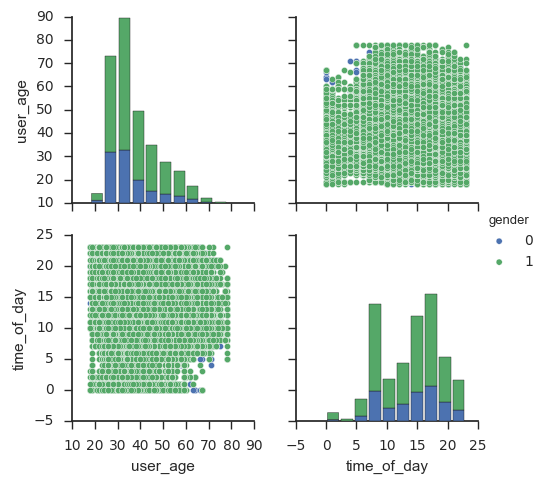

In [47]:
sns.pairplot(test_data, diag_kind = 'hist', hue = 'gender', vars=['user_age', 'time_of_day'])

In [48]:
positive

,gender,user_age,time_of_day,over
234,1,29.0,22,1
303,1,25.0,22,1
661,0,27.0,21,1
694,1,25.0,21,1
698,1,31.0,21,1
1005,1,39.0,21,1
1029,0,36.0,21,1
1062,0,50.0,21,1
1163,1,26.0,20,1
1205,0,40.0,20,1
